## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

My Binder link: 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [2]:
! wget http://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc

URL transformed to HTTPS due to an HSTS policy
--2018-12-05 23:11:51--  https://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc
Resolving rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)... 128.149.112.22
Connecting to rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)|128.149.112.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26095988 (25M) [application/x-netcdf]
Saving to: ‘CS2_combined_Southern_Ocean_2011-2016.nc.4’

CS2_combined_Southe 100%[===================>]  24.89M  40.0MB/s    in 0.6s    

2018-12-05 23:11:52 (40.0 MB/s) - ‘CS2_combined_Southern_Ocean_2011-2016.nc.4’ saved [26095988/26095988]



In [3]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2, decode_times=False)
ds = ds.set_coords(['Latitude', 'Longitude', 'Area'])
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Data variables:
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [4]:
#checking projection type
ds.attrs['Projection:']

'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'

In [5]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [6]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [7]:
ccrs.Stereographic?

Init signature: ccrs.Stereographic(central_latitude=0.0, central_longitude=0.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=None, scale_factor=None, globe=None)
Docstring:     
Define a projected coordinate system with flat topology and Euclidean
distance.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /opt/conda/lib/python3.6/site-packages/cartopy/crs.py
Type:           ABCMeta


In [8]:
#Changing X & Y from km to m
ds_scaled = ds.copy()
ds_scaled['X'] = ds['X'] * 1000
ds_scaled['Y'] = ds['Y'] * 1000
# how to change unit names from km to m

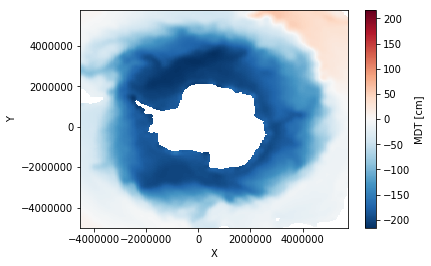

In [9]:
ds_scaled.MDT.plot()

In [10]:
#.values.item()?
# is this value from Latitude value itself or is it of Y?
#trying to find center point of each coord
center_point = {'X':len(ds.X)//2, 'Y':len(ds.Y)//2}
center_lat = ds.Latitude.isel(**center_point).values.item()
center_lat

-83.2791519165039

Text(0.5,1,'Using stereographic proj instead of SouthPolar')

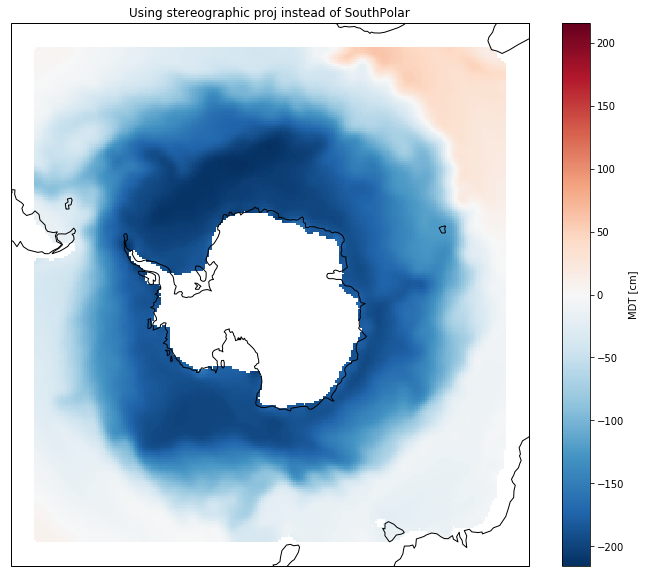

In [14]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat, false_northing=8e5)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=proj)
ax.coastlines()
ds_scaled.MDT.plot()
plt.title('Using stereographic proj instead of SouthPolar')
#ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

Text(0.5,1,'Using Pcolormesh')

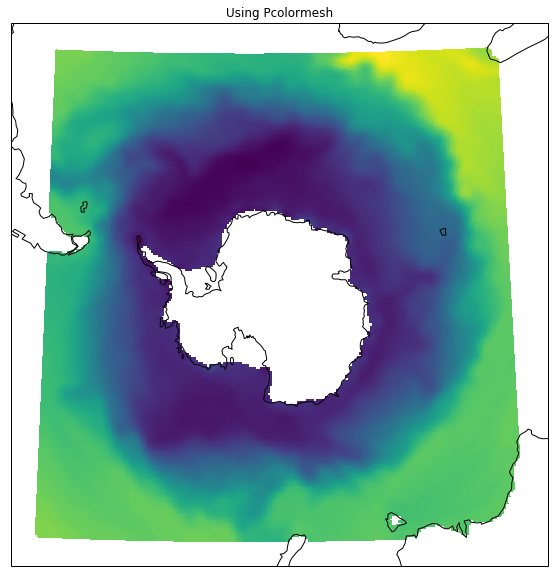

In [13]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ax.pcolormesh(ds_scaled.Longitude, ds_scaled.Latitude, ds_scaled.MDT, transform=ccrs.PlateCarree())
plt.title('Using Pcolormesh')

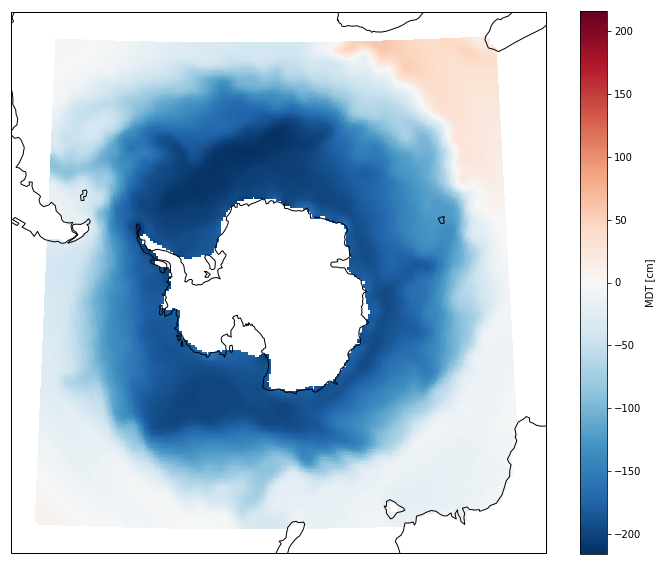

In [13]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree())

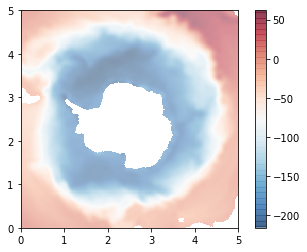

In [14]:
contours = plt.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(ds.MDT, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdBu_r', alpha=0.5)
plt.colorbar();

Text(0.5,1,'Figure 5a\nMean Dynamic Ocean Topography (MDT))')

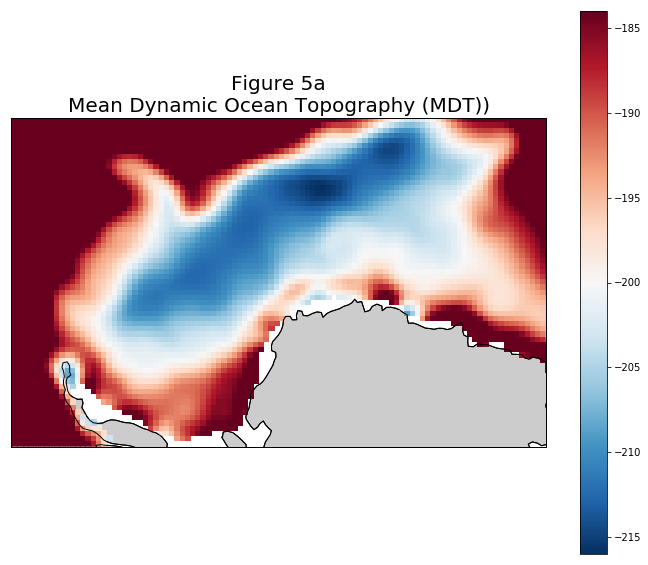

In [24]:
#missing contour lines and 1km isobath line
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

mdt_cs = ax.pcolormesh(ds.Longitude, ds.Latitude, ds.MDT, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-216, vmax=-184)
ax.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='k')
plt.colorbar(mdt_cs)
plt.title('Figure 5a\nMean Dynamic Ocean Topography (MDT))', fontsize=20)

>**Figure 5a).** Seasonal variability of the Weddell Gyre: the mean dynamic ocean topography cm, the color scale is purposefully saturated to highlight the Weddell Gyre.

In [57]:
ds.variables

Frozen(OrderedDict([('date', <xarray.IndexVariable 'date' (date: 72)>
array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206,
       201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409,
       201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506,
       201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612],
      dtype=int32)
Attributes:
    units:    YYYYMM), ('X', <xarray.IndexVariable 'X' (X: 205)>
array([-4475., -4425., -4375., ...,  5625.,  5675.,  5725.], dtype=float32)
Attributes:
    units:         km
    registration:  grid cell centerpoint), ('Y', <xarray.IndexVariable 'Y' (Y: 215)>
array(

In [58]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [59]:
ds.Longitude.assign_coords()

<xarray.DataArray 'Longitude' (Y: 215, X: 205)>
array([[-138.02869 , -138.34859 , -138.67169 , ...,  131.49097 ,  131.23949 ,
         130.9905  ],
       [-137.74078 , -138.06102 , -138.38452 , ...,  131.20393 ,  130.95279 ,
         130.70415 ],
       [-137.44966 , -137.7702  , -138.09406 , ...,  130.91438 ,  130.66359 ,
         130.41533 ],
       ...,
       [ -38.504196,  -38.19095 ,  -37.87498 , ...,   45.      ,   45.253517,
          45.504795],
       [ -38.257412,  -37.944813,  -37.629528, ...,   44.74648 ,   45.      ,
          45.251293],
       [ -38.013294,  -37.70136 ,  -37.386776, ...,   44.495205,   44.748703,
          45.      ]], dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...


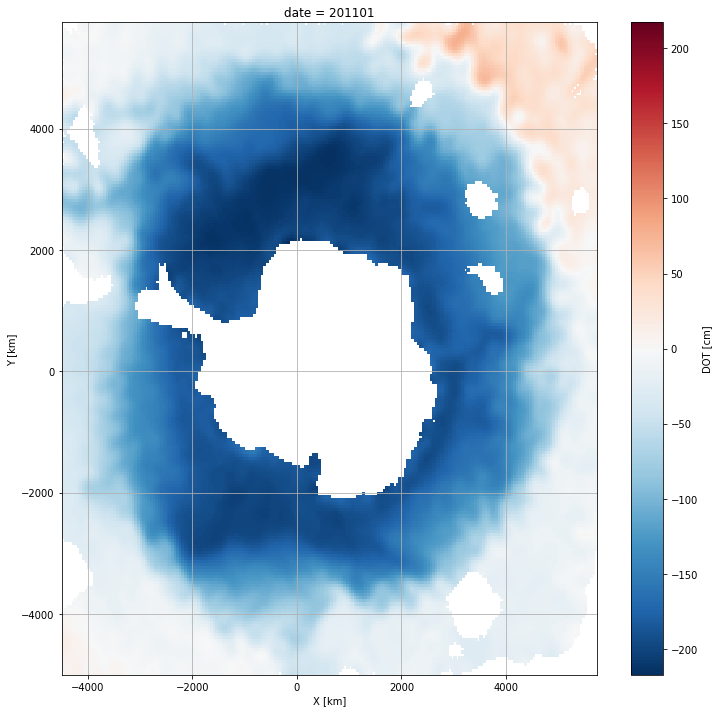

In [60]:
ds.DOT[0].plot(figsize=(12,12))
plt.grid()

In [ ]:
ds

In [ ]:
ds.Longitude.plot()

#Lon, Lat are 2D variables, don't really worry about them being variables in this case
ds.assign_coords(ds.Longitude)

ds.Longitude.sel([-78,20], method='nearest')

In [ ]:
ds.Longitude[-97]

In [ ]:
ds.attrs

In [ ]:
ds.Longitude[-78]

In [ ]:
ds.DOT.sel(Latitude=slice(-78,20), Longitude=slice(-60,-75))

### Figure 4a)

In [ ]:
ds.Longitude.plot()

In [ ]:
#How to add contouring?
#How to add thick, black line of 1km isobath?
#How to fix colorbar size

extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-216, vmax=-184);

#ax.contour(ds.Longitude.sel(Y=slice(0,None)), ds.Latitude.sel(Y=slice(0,None)), ds.MDT.sel(Y=slice(0,None)), 
           #transform=ccrs.PlateCarree(),cmap='RdBu_r', levels=np.linspace(-216,-184,8))

In [ ]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

## Figure 6b)

### Calculating Wind Curl (not windstress curl)

In [3]:
u10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.u10.nc/.u10/dods'

ds_u10_orig = xr.open_dataset(u10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})

#fixing time
def fix_calendar(ds_u10_orig, timevar='time'):
    if ds_u10_orig[timevar].attrs['calendar'] == '360':
        ds_u10_orig[timevar].attrs['calendar'] = '360_day'
    return ds_u10_orig

ds_u10_orig = fix_calendar(ds_u10_orig)
ds_u10_orig = xr.decode_cf(ds_u10_orig)

#fixing lon
ds1 = ds_u10_orig.roll(lon=-181).copy()
ds2 = ds1.drop('lon')
lon = ds1.lon.data
lon[lon>180.] -= 360.
ds2.coords['lon'] = ('lon', lon)
ds_u10 = ds2
ds_u10.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179., -178., -177., ...,  178.,  179.,  180.], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...

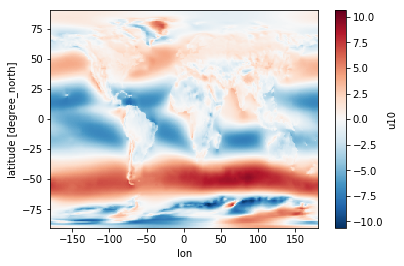

In [4]:
ds_u10.u10.mean(dim='time').plot()

$$
wind\ curl\ = \bigtriangledown \times (|\mathbf{u_{10}}|\mathbf{u_{10}})
$$

In [5]:
#only need -du/dy for the laplace
#calculating meters per latitudinal degree
earth_circumference = 2*np.pi*6.371e6
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [6]:
delta_lat = ds_u10.lat.diff('lat')
delta_lat

<xarray.DataArray 'lat' (lat: 180)>
array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.

In [7]:
#converting lat from degrees to meters
delta_y = delta_lat * meters_per_degree
delta_y

<xarray.DataArray 'lat' (lat: 180)>
array([-111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.93, -111194.93, -111194.93, -111194.93, -111194.93, -111194.93,
       -111194.9

In [8]:
delta_u = ds_u10.u10.diff(dim='lat')
delta_u

<xarray.DataArray 'u10' (time: 468, lat: 180, lon: 360)>
array([[[-0.382265, -0.381866, ..., -0.380272, -0.383062],
        [-0.905637, -0.898462, ..., -0.913609, -0.912413],
        ...,
        [ 2.77431 ,  2.760359, ...,  2.787863,  2.78866 ],
        [ 1.0308  ,  1.026016, ...,  1.038373,  1.035982]],

       [[ 0.095666,  0.099652, ...,  0.092078,  0.091281],
        [ 0.218038,  0.224416, ...,  0.202094,  0.211661],
        ...,
        [ 3.05493 ,  3.031811, ...,  3.088812,  3.077252],
        [ 1.380379,  1.368421, ...,  1.402701,  1.393533]],

       ...,

       [[-0.359897, -0.359073, ..., -0.358661, -0.361132],
        [-0.644026, -0.644849, ..., -0.640731, -0.64279 ],
        ...,
        [ 3.326368,  3.335839, ...,  3.284366,  3.316485],
        [ 1.616241,  1.624477, ...,  1.611711,  1.608417]],

       [[-0.170066, -0.156889, ..., -0.169654, -0.181595],
        [-0.341366, -0.342602, ..., -0.344249, -0.340543],
        ...,
        [ 2.68646 ,  2.669989, ...,  2.694695,

In [9]:
#absolute value of u_10
u_abs = np.absolute(ds_u10.u10)
u_abs

<xarray.DataArray 'u10' (time: 468, lat: 181, lon: 360)>
array([[[0.955762, 0.961342, ..., 0.940615, 0.95058 ],
        [0.573497, 0.579476, ..., 0.560343, 0.567518],
        ...,
        [0.172498, 0.132637, ..., 0.251422, 0.212757],
        [1.203297, 1.158653, ..., 1.289795, 1.248739]],

       [[1.177786, 1.178185, ..., 1.170213, 1.177786],
        [1.273452, 1.277837, ..., 1.262291, 1.269068],
        ...,
        [0.675541, 0.66996 , ..., 0.68431 , 0.680324],
        [2.055919, 2.038381, ..., 2.087011, 2.073857]],

       ...,

       [[0.855979, 0.855979, ..., 0.850626, 0.856391],
        [0.496082, 0.496906, ..., 0.491965, 0.495259],
        ...,
        [2.94682 , 3.007763, ..., 2.818756, 2.885876],
        [1.330579, 1.383287, ..., 1.207044, 1.277459]],

       [[5.46628 , 5.431279, ..., 5.497576, 5.500458],
        [5.296215, 5.27439 , ..., 5.327922, 5.318863],
        ...,
        [1.618002, 1.669886, ..., 1.510527, 1.565706],
        [0.2373  , 0.28589 , ..., 0.132296, 0.1

In [10]:
wind_curl = (-delta_u / delta_y) * u_abs
wind_curl

<xarray.DataArray (time: 468, lat: 180, lon: 360)>
array([[[-1.971562e-06, -1.990040e-06, ..., -1.916298e-06, -1.955076e-06],
        [-2.705143e-06, -2.577426e-06, ..., -2.902535e-06, -2.830049e-06],
        ...,
        [ 4.303808e-06,  3.292641e-06, ...,  6.303612e-06,  5.335735e-06],
        [ 1.115481e-05,  1.069111e-05, ...,  1.204451e-05,  1.163426e-05]],

       [[ 1.095606e-06,  1.145186e-06, ...,  1.045280e-06,  1.041792e-06],
        [ 2.924614e-06,  3.031882e-06, ...,  2.661485e-06,  2.818582e-06],
        ...,
        [ 1.855956e-05,  1.826695e-05, ...,  1.900900e-05,  1.882755e-05],
        [ 2.552227e-05,  2.508534e-05, ...,  2.632720e-05,  2.599028e-05]],

       ...,

       [[-1.605634e-06, -1.604620e-06, ..., -1.586841e-06, -1.608471e-06],
        [-8.568670e-07, -8.579627e-07, ..., -8.572295e-07, -8.528430e-07],
        ...,
        [ 8.815334e-05,  9.023264e-05, ...,  8.325763e-05,  8.607376e-05],
        [ 1.934023e-05,  2.020880e-05, ...,  1.749546e-05,  1.847824

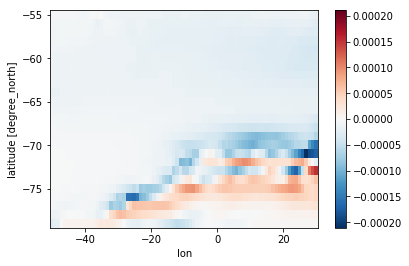

In [20]:
wind_curl.sel(lon=slice(-50,30), lat=slice(-55, -79)).mean('time').plot()

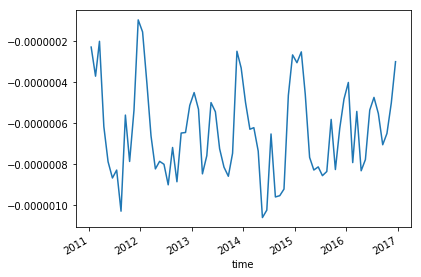

In [26]:
wind_curl.sel(time=slice('2011','2016')).mean(['lat', 'lon']).plot()

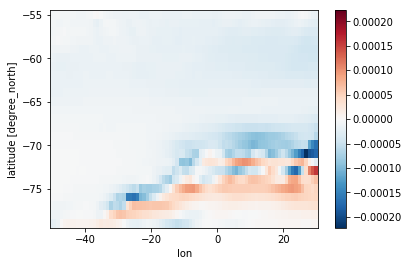

In [39]:
weddell_wind_curl = wind_curl.sel(lon=slice(-50,30), lat=slice(-55, -79), time=slice('2011','2016'))
weddell_wind_curl.mean('time').plot()

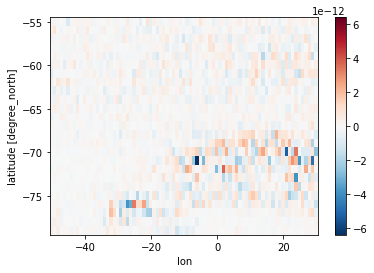

In [40]:
#taking out monthly mean to take out seasonal cycle
weddell_season_out = weddell_wind_curl.groupby('time.month') - weddell_wind_curl.groupby('time.month').mean(dim='time')
weddell_season_out.mean('time').plot()

Text(0.5,1,'Figure 6b)')

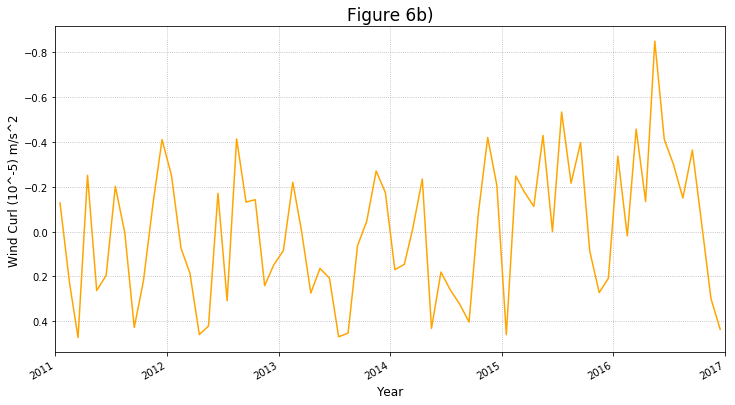

In [106]:
(weddell_season_out*1e5).mean(['lat','lon']).plot(figsize=(12,6), c='orange')
plt.grid(linestyle='dotted')
plt.ylabel('Wind Curl (10^-5) m/s^2', fontsize=12)
plt.gca().invert_yaxis()
plt.xlim(xmin='2011', xmax='2017')
plt.xlabel('Year', fontsize=12)
plt.title('Figure 6b)', fontsize=17, fontweight=20)

## Figure 7a)

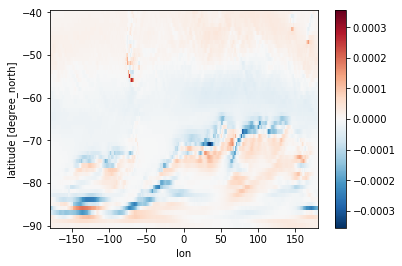

In [109]:
aa_wind_curl = wind_curl.sel(lon=slice(-179,180), lat=slice(-40, -90), time=slice('2011','2016'))
aa_wind_curl.mean('time').plot()

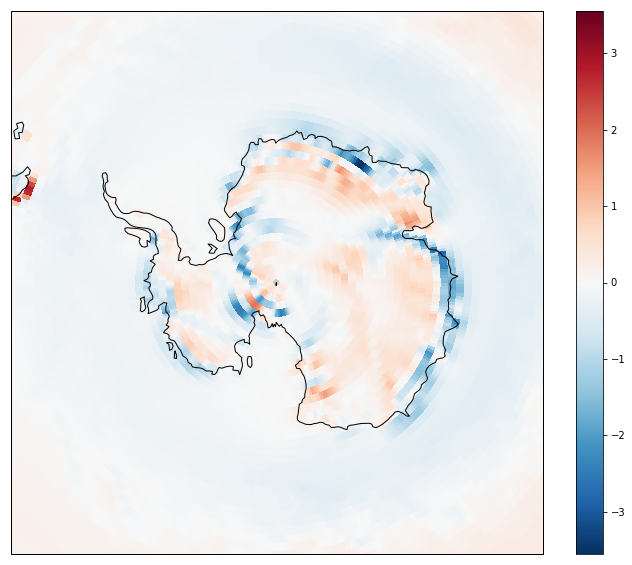

In [120]:
extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))
central_lon = np.mean(extent[:2])

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

(aa_wind_curl*1e4).mean('time').plot(transform=ccrs.PlateCarree(central_longitude=central_lon), cmap='RdBu_r');
#, vmin=-12e-5, vmax=2e-5)

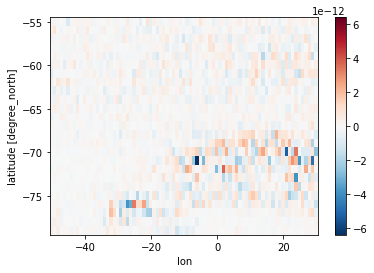

In [121]:
#taking out monthly mean to take out seasonal cycle
aa_season_out = aa_wind_curl.groupby('time.month') - weddell_wind_curl.groupby('time.month').mean(dim='time')
aa_season_out.mean('time').plot()

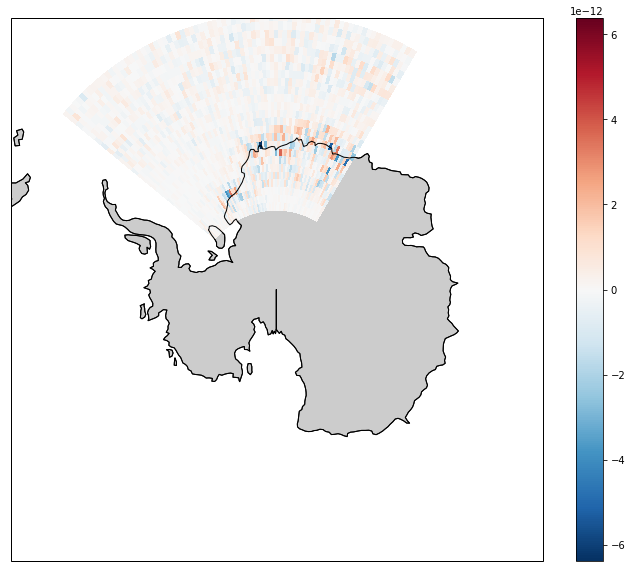

In [122]:
#why is aa_season_out not plotting whole continent like aa_wind_curl?

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))
central_lon = np.mean(extent[:2])

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

aa_season_out.mean('time').plot(transform=ccrs.PlateCarree(central_longitude=central_lon), cmap='RdBu_r');
#, vmin=-12e-5, vmax=2e-5)

### Calculating Gyre Depth

In [ ]:
mean_DOT = ds.DOT.mean()
mean_DOT

In [ ]:
SLA_light_blue = ds.SLA.groupby('time.month').mean(dim='time')
SLA_dark_blue = ds.SLA.groupby('time.month').mean(dim='time')

In [ ]:
gyre_depth = SLA_light_blue - SLA_dark_blue

In [ ]:
#Do we calculate f with ds.Latitude or ds.Y? I think ds.Latitude
g = 9.81 #m/s-2
omega = 7.2921159e-5 #rad/sec
f = 2*omega*np.sin(ds.Latitude) #s-1

In [ ]:
del_x = 
del_y = 
lap_H = [del_delx, del_dely, 0]

$$
\mathbf{u_g} = \frac{f/g}( \hat{k} \times \nabla_{H}H_{DOT})
$$

### Fig 7a)
Average over seasons: summer-(JFM), **autumn-(AMJ)**, winter-(JAS), **spring-(OND)**

In [123]:
ds.SLA
# there are more than one X,Y pts for each date
# there are 10 less X values than Y

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
[3173400 values with dtype=float32]
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [129]:
ds.SLA.date

<xarray.DataArray 'date' (date: 72)>
array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206,
       201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409,
       201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506,
       201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612],
      dtype=int32)
Coordinates:
  * date     (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
Attributes:
    units:    YYYYMM

In [ ]:
ds.SLA.groupby('time.month').mean(dim='time')

In [ ]:
#or maybe rolling mean of time=3 for every 3 months?
x = ds.SLA.rolling(date=3, center=True).mean(dim='time')
x

## Figure 10 a)

In [135]:
ds.SLA

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
[3173400 values with dtype=float32]
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

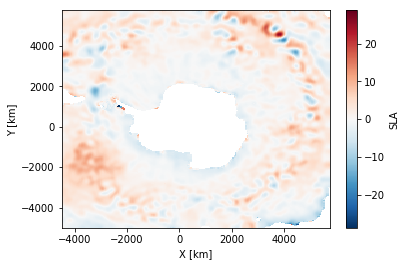

In [140]:
nino = ds.SLA.sel(date=slice('201506','201604')).mean(dim='date')
nino.plot()

Text(0.5,1,'Figure 10a)\nEl Nino SLA (cm)')

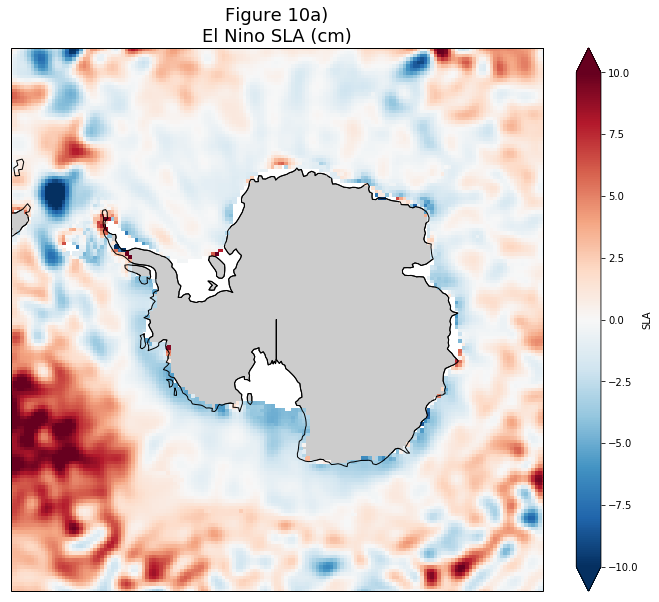

In [198]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

CS=nino.plot.pcolormesh(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar(CS)
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

In [ ]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.pcolormesh(ds.Longitude,nin.Latitude, nino, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-10, vmax=10)
#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.colorbar(CS)
#plt.show()
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18)

> **Figure 10a).** June 2015 to April 2016 time-mean sea level anomaly (cm).